# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Ole Quiring

Datum: 22.11.23

Gruppe: 48

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann man die Übertragung von Wärme anhand von Messdaten genauer berechnen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/picture_231010_Beispielbild_Tasse_Auswertung.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
pathh5="h5stuff2/h5stuff2.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

dataset = h5py.File(pathh5, "r+")
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


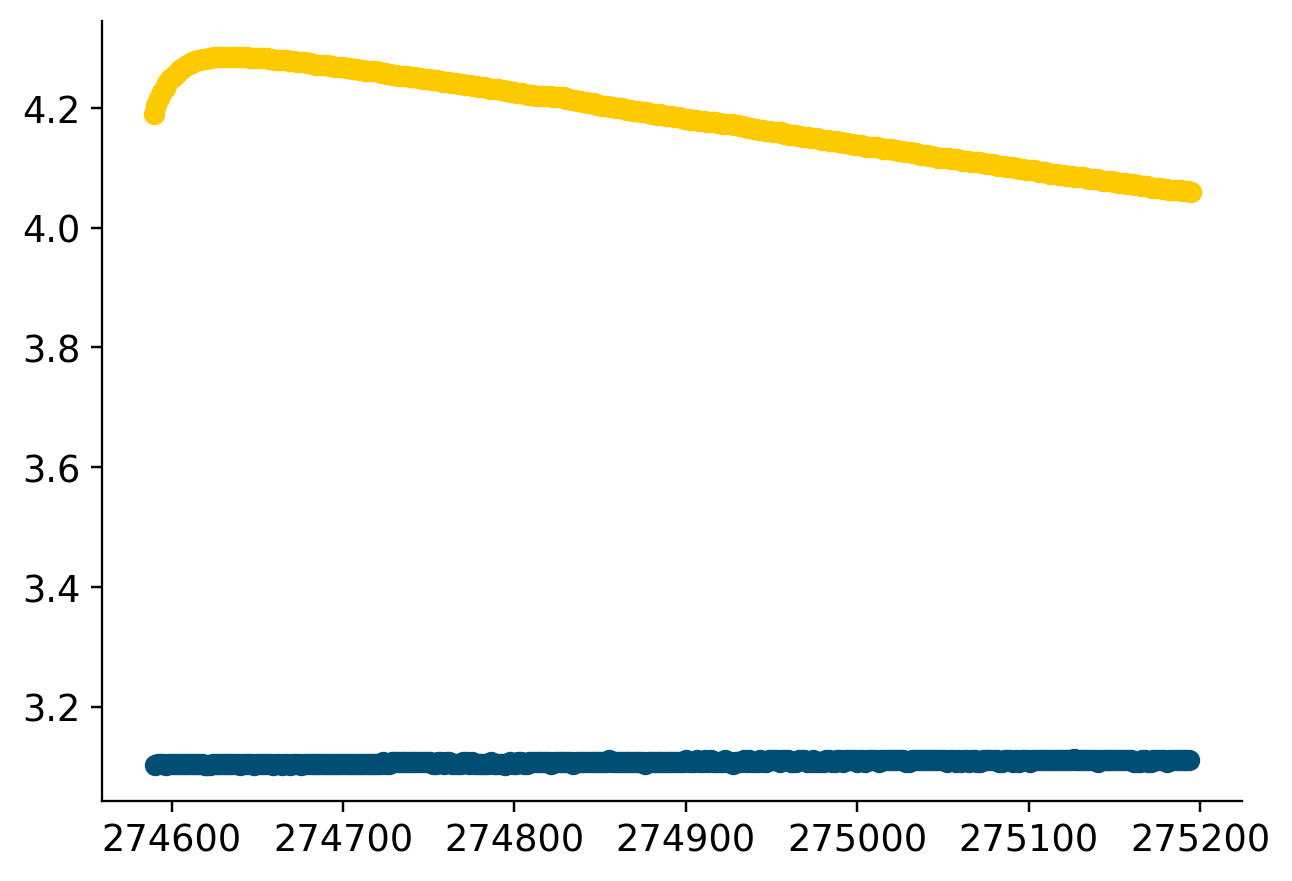

In [4]:
# TODO: Use the temperature and time data for plotting
temp1 = []
time1 = []
temp2 = []
time2 = []
for k, current in enumerate(dataset['RawData']):
    for content in dataset["RawData"][current]:
        for i, actual_contents in enumerate(dataset['RawData'][current][content]):
            if k == 0:
                if content == 'time_stamp':
                    time1.append(actual_contents[0])
                    continue
                temp1.append(actual_contents[0])
            elif k == 1:
                if content == 'time_stamp':
                    time2.append(actual_contents[0])
                    continue
                temp2.append(actual_contents[0])
plt.scatter(time2,np.log(temp2))

plt.scatter(time1,np.log(temp1))

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [28]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
F=[]

for t in range(len(temp2)):
    if t == 0:
        continue
    else:
        F.append((np.log((temp1[t]-temp1[-1])/(temp1[1]-temp1[-1])))/t)
K=np.mean(F)

# DONE #

#### (iV) Ergebnis

In [30]:
# TODO: Print result
print(K)

# DONE #

0.0019018331812830401


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Ich kann mir in der Bestätigung des Newtonschen Kühlungsgesetzes nicht sicher sein jedoch habe ich ein K erhalten.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich konnte mehr über das arbeiten mit FAIR Prinzipien lernen und habe mich mehr in Python und Git reinarbeiten können. Somit hatte das Experiment, auch falls mein Ergebnis ungenau sein sollte, eine positive Auswirkung und brachte mich weiter